In [1]:
import numpy as np
import pandas as pd

In [2]:
def mse(y, y1):
    error = y - y1
    return np.mean(error ** 2)

In [3]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
          Training data

        Returns
        -------
          of the following form. ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function

        """
        x1 = X

        if self.no_bias:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])
            
        return np.concatenate([x0.reshape(-1,1), x1], axis=1)
    
    
    def _gradient_descent(self, X, error):
        """
        Optimize the error using the gradient decent and update the theta values(weights)
        
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
          Training data
          
        error: of the following form. ndarray, shape (n_samples, 1)

        """
        

        self.theta = self.theta - self.lr * np.dot(error, X)/len(X)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """

        x1 = self._linear_hypothesis(X)
        
        if isinstance(X_val, np.ndarray):
            x2 = self._linear_hypothesis(X_val)
        
        self.theta = np.random.random(x1.shape[1])
        
        for i in range(self.iter):
            y1 = np.dot(x1, self.theta)

            #compute the loss function
            error = y1 - y
            self.loss[i] += mse(y, y1)/2

            # if x_val is entered, fit to it
            if isinstance(X_val, np.ndarray):
                y2 = np.dot(x2, self.theta)
                error_val = y2 - y_val
                self.val_loss[i] += mse(y2, y_val)/2


            # optimize the objective function using gradient descent
            self._gradient_descent(x1, error)

            if self.verbose:
                #Output learning process when verbose is set to True
                print("n_iter: ", i,
                    "loss: ", self.loss[i],
                    "theta: ", self.theta)

        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        return np.dot(self._linear_hypothesis(X), self.theta)

## Problem Six: Learning and Estimation

In [4]:
import pandas as pd

df = pd.read_csv("train.csv")
X = df[["YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)
print(X.shape)
print(y.shape)

(1460, 1)
(1460,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 1)
(1168,)
(292, 1)
(292,)


In [6]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [7]:
reg1 = ScratchLinearRegression(10000, 0.0001, False, True)
reg1.fit(X_train_std, y_train, X_test_std, y_test)
y_pred1 = reg1.predict(X_test_std)
y_pred1

n_iter:  0 loss:  19424399806.91706 theta:  [18.09453547  4.25607187]
n_iter:  1 loss:  19420963514.38387 theta:  [36.17361591  8.3456391 ]
n_iter:  2 loss:  19417527909.074825 theta:  [54.25088845 12.43479737]
n_iter:  3 loss:  19414092990.852486 theta:  [72.32635326 16.52354672]
n_iter:  4 loss:  19410658759.57944 theta:  [90.40001052 20.6118872 ]
n_iter:  5 loss:  19407225215.11831 theta:  [108.47186042  24.69981884]
n_iter:  6 loss:  19403792357.33173 theta:  [126.54190313  28.78734169]
n_iter:  7 loss:  19400360186.082382 theta:  [144.61013883  32.87445579]
n_iter:  8 loss:  19396928701.232964 theta:  [162.67656772  36.96116118]
n_iter:  9 loss:  19393497902.6462 theta:  [180.74118996  41.0474579 ]
n_iter:  10 loss:  19390067790.184845 theta:  [198.80400574  45.13334599]
n_iter:  11 loss:  19386638363.711685 theta:  [216.86501523  49.21882549]
n_iter:  12 loss:  19383209623.089516 theta:  [234.92421863  53.30389644]
n_iter:  13 loss:  19379781568.181194 theta:  [252.9816161   57.3

array([102480.72836023,  88870.62004932,  96526.3059742 , 119493.36374886,
       114389.57313227,  62501.03519693, 145012.31683181,  85468.09297159,
       135655.36736806, 142460.42152352, 144161.68506238, 118642.73197943,
       138207.26267636, 110987.04605454,  94825.04243534, 102480.72836023,
       132252.84029034, 133954.1038292 , 110136.41428511,  66754.19404409,
        98227.56951307, 142460.42152352, 107584.51897682, 133954.1038292 ,
       116941.46844057,  38683.34565284, 139057.89444579, 113538.94136284,
       145012.31683181,  93974.41066591, 103331.36012966, 133103.47205977,
       120343.99551829, 139057.89444579, 145862.94860124, 135655.36736806,
       143311.05329295, 115240.2049017 , 141609.78975409, 133954.1038292 ,
        96526.3059742 , 100779.46482136, 143311.05329295, 142460.42152352,
       134804.73559863, 108435.15074625, 100779.46482136, 118642.73197943,
       120343.99551829,  93123.77889648, 141609.78975409, 109285.78251568,
       119493.36374886,  

[]

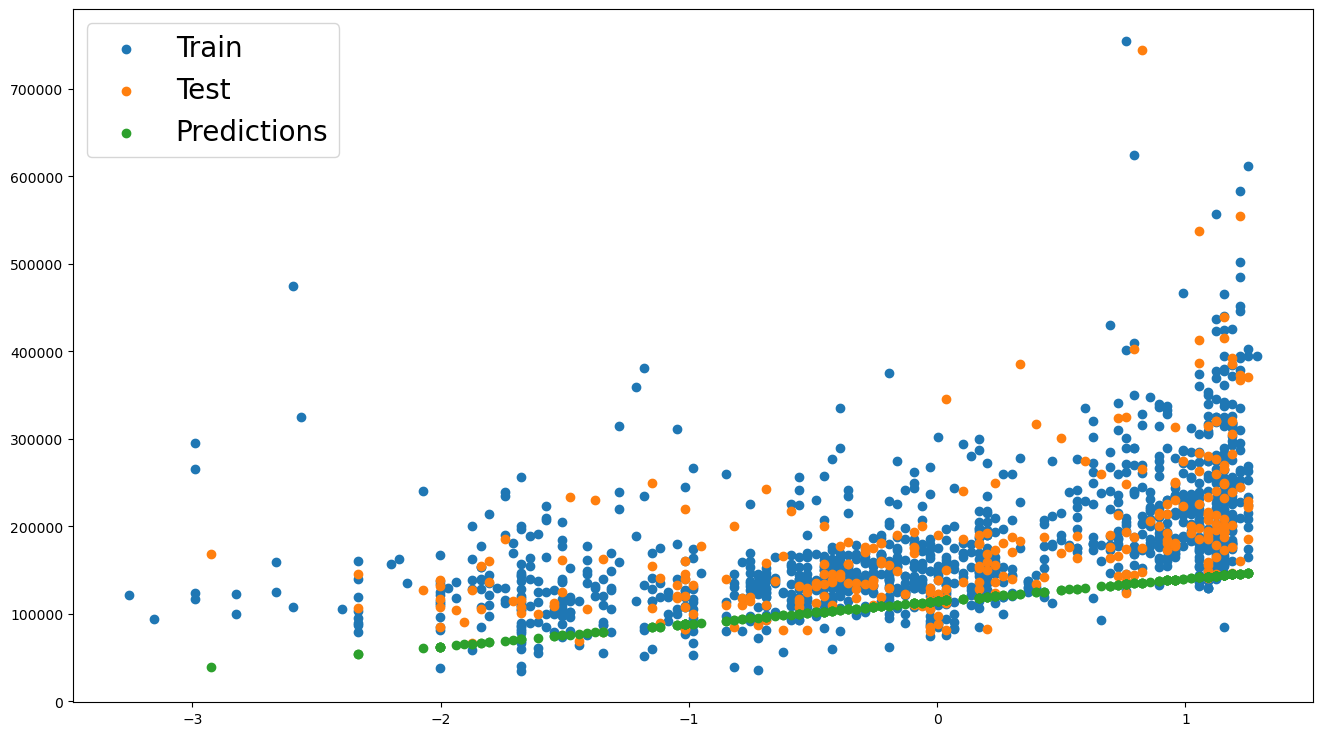

In [8]:
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred1, label="Predictions")
plt.legend()
plt.plot()

In [9]:
# Checking our model's performance using the MSE and RMSE metrics
mse_val = mse(y_test, y_pred1)
print(f"MSE: {mse_val}")
print(f"RMSE: {np.sqrt(mse_val):.1f}")

MSE: 9610152577.121202
RMSE: 98031.4


In [10]:
# Comparing with sklearn
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()
reg2.fit(X_train_std, y_train)
y_pred_sk = reg2.predict(X_test_std)

[]

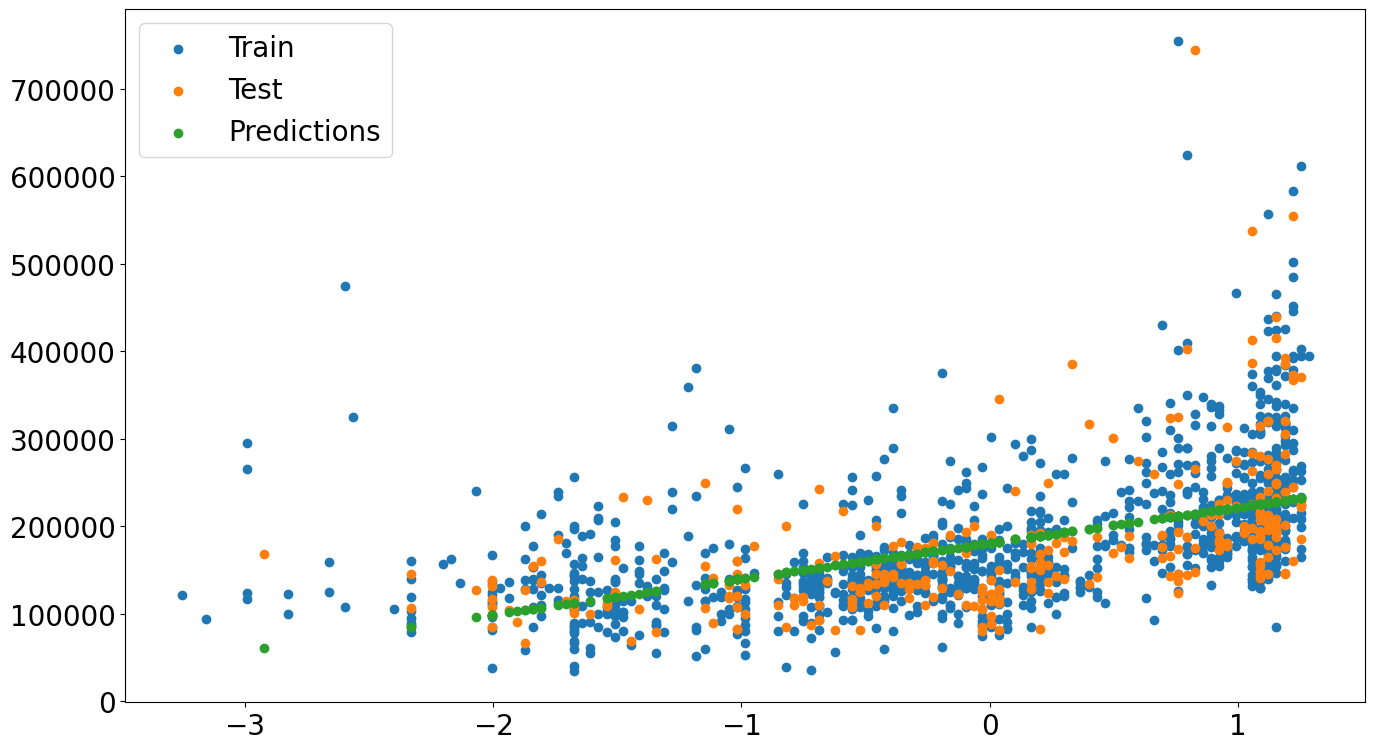

In [11]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred_sk, label="Predictions")
plt.legend()
plt.plot()

In [12]:
# Checking the Sklearn model's performance using the MSE and RMSE metrics
mse_sk = mse(y_test, y_pred_sk)
print(f"MSE: {mse_sk}")
print(f"RMSE: {np.sqrt(mse_sk):.1f}")

MSE: 4980069536.617275
RMSE: 70569.6


## Problem Seven: Plotting the learning curve

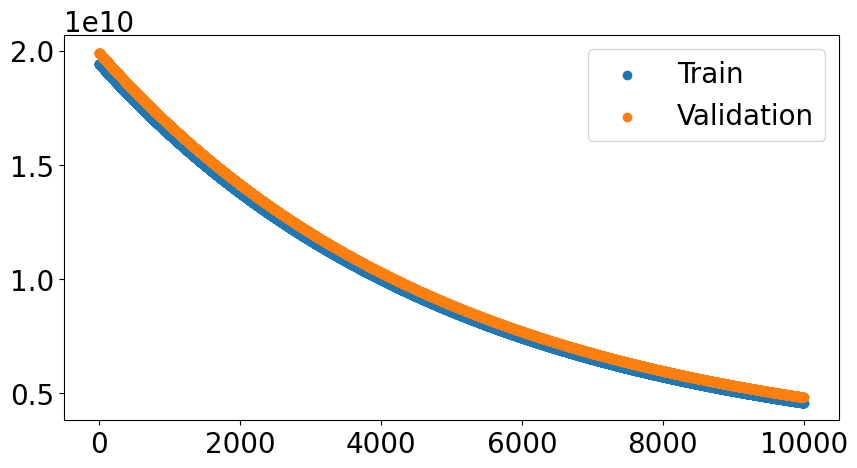

In [13]:
def display_learning_curve(loss, val_loss):
    fig = plt.subplots(figsize=(10, 5))
    plt.rcParams["font.size"] = 20
    
    plt.scatter(range(len(loss)), loss, label="Train")
    plt.scatter(range(len(val_loss)), val_loss, label="Validation")
    plt.legend()
    plt.plot()

display_learning_curve(loss = reg1.loss, val_loss= reg1.val_loss)

## Problem Eight: (Advance task) Removal of bias term

In [14]:
# To remove the bias term, we set the no_bias parameter to True
reg2 = ScratchLinearRegression(10000, 0.001, True, True)
reg2.fit(X_train_std, y_train, X_test_std, y_test)
y_pred2 = reg2.predict(X_test_std)
y_pred2

n_iter:  0 loss:  19424382035.38822 theta:  [ 0.75017301 41.56021039]
n_iter:  1 loss:  19422710121.689922 theta:  [ 0.75017301 82.41857851]
n_iter:  2 loss:  19421041550.147106 theta:  [  0.75017301 123.23608827]
n_iter:  3 loss:  19419376314.078804 theta:  [  0.75017301 164.01278052]
n_iter:  4 loss:  19417714406.817406 theta:  [  0.75017301 204.74869608]
n_iter:  5 loss:  19416055821.70862 theta:  [  0.75017301 245.44387572]
n_iter:  6 loss:  19414400552.11147 theta:  [  0.75017301 286.09836018]
n_iter:  7 loss:  19412748591.398235 theta:  [  0.75017301 326.71219016]
n_iter:  8 loss:  19411099932.954475 theta:  [  0.75017301 367.2854063 ]
n_iter:  9 loss:  19409454570.178944 theta:  [  0.75017301 407.81804923]
n_iter:  10 loss:  19407812496.4836 theta:  [  0.75017301 448.31015952]
n_iter:  11 loss:  19406173705.29357 theta:  [  0.75017301 488.7617777 ]
n_iter:  12 loss:  19404538190.047134 theta:  [  0.75017301 529.17294426]
n_iter:  13 loss:  19402905944.19567 theta:  [  0.75017301

array([ -18690.61085538,  -40219.83519373,  -28109.64650341,
          8220.91956755,     147.46044067,  -81932.70734928,
         48588.21520196,  -45602.14127832,   33786.87346934,
         44551.48563852,   47242.63868081,    6875.34304641,
         37823.60303278,   -5234.84564391,  -30800.7995457 ,
        -18690.61085538,   28404.56738476,   31095.72042705,
         -6580.42216506,  -75204.82474354,  -25418.49346111,
         44551.48563852,  -10617.1517285 ,   31095.72042705,
          4184.19000411, -119608.84994139,   39169.17955393,
         -1198.11608047,   48588.21520196,  -32146.37606685,
        -17345.03433423,   29750.1439059 ,    9566.4960887 ,
         39169.17955393,   49933.7917231 ,   33786.87346934,
         45897.06215966,    1493.03696182,   43205.90911737,
         31095.72042705,  -28109.64650341,  -21381.76389767,
         45897.06215966,   44551.48563852,   32441.2969482 ,
         -9271.57520735,  -21381.76389767,    6875.34304641,
          9566.4960887 ,

[]

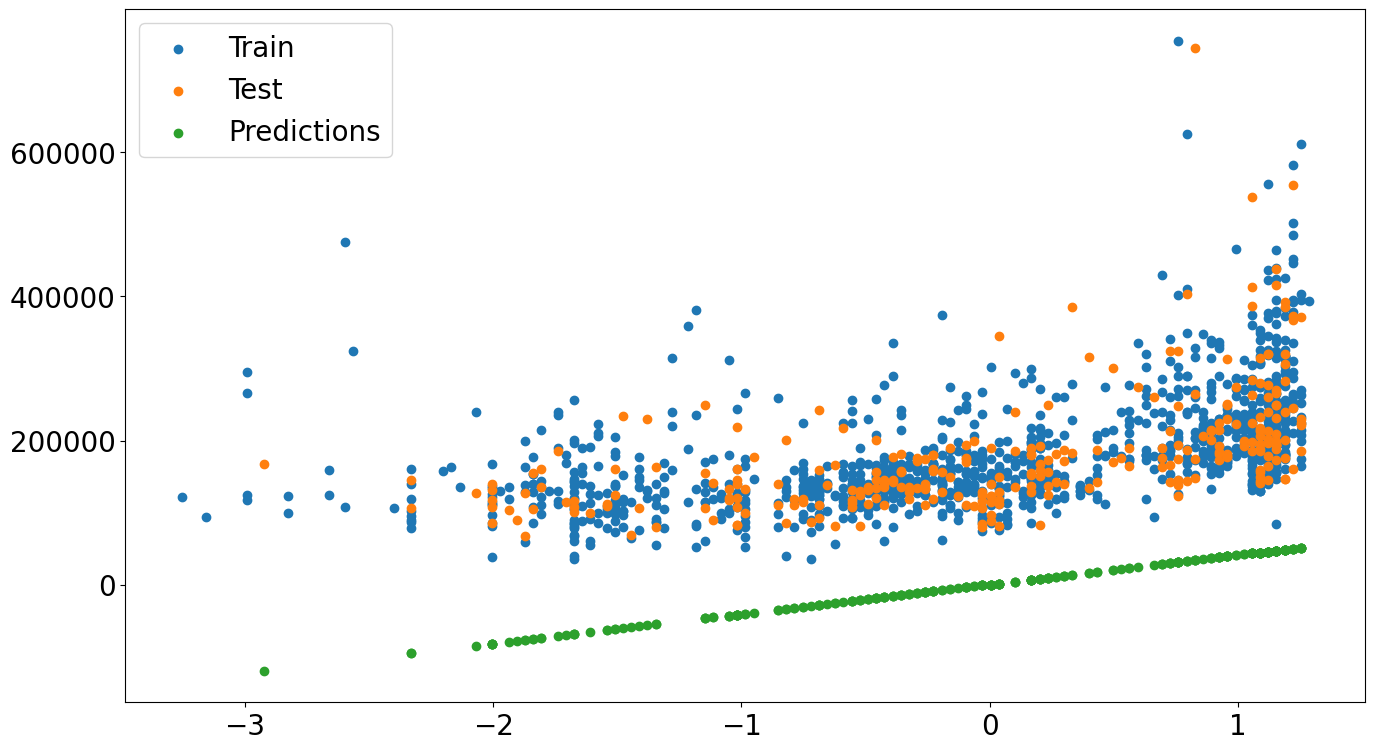

In [15]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std, y_train, label="Train")
plt.scatter(X_test_std, y_test, label="Test")
plt.scatter(X_test_std, y_pred2, label="Predictions")
plt.legend()
plt.plot()

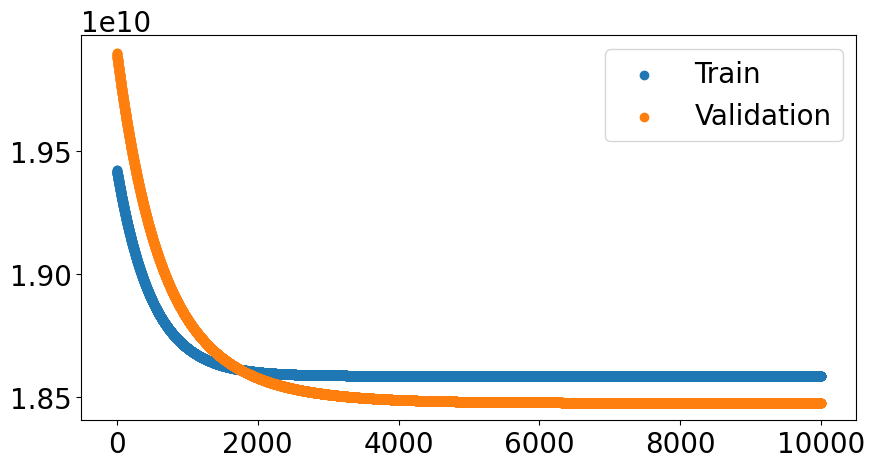

In [16]:
display_learning_curve(loss = reg2.loss, val_loss= reg2.val_loss)

In [17]:
# Checking our model's performance using the MSE and RMSE metrics
mse_2 = mse(y_test, y_pred2)
print(f"MSE: {mse_2}")
print(f"RMSE: {np.sqrt(mse_2):.1f}")

MSE: 36956808562.54384
RMSE: 192241.5


Training our regression model when the bias term is removed forces our regression line to cut through the origin (0, 0), this causes the regression line to have a different slope and intercept compared to a model with the bias term. The absence of the bias term can make the model more sensitive to outliers. Since the regression line must pass through the origin, outliers can have a larger impact on the slope of the line, potentially leading to overfitting. The difference in the learning curve of the regression model without a bias term shows that the training dataset is learning at a different rate from the test dataset, proving that the model isn't learning well.

## Problem Nine: (Advance task) Multidimensional feature quantity

In [18]:
df = pd.read_csv("train.csv")
X = df[["YearBuilt", "YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)

# Taking the square of X for input
X[:, 1] = X[:, 1]**2
print(X[0])
print(X.shape)
print(y.shape)

[   2003 4012009]
(1460, 2)
(1460,)


In [19]:
# Splitting the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 2)
(1168,)
(292, 2)
(292,)


In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [21]:
reg3 = ScratchLinearRegression(5000, 0.01, False, True)
reg3.fit(X_train_std, y_train, X_test_std, y_test)
y_pred3 = reg3.predict(X_test_std)
y_pred3

n_iter:  0 loss:  19424388893.724678 theta:  [1808.11642305  409.31896898  410.90097081]
n_iter:  1 loss:  19065833252.63133 theta:  [3598.12424854  810.11620001  813.55644685]
n_iter:  2 loss:  18715068292.17707 theta:  [5370.23199579 1202.87904808 1208.17753927]
n_iter:  3 loss:  18371913023.375 theta:  [7124.61866555 1587.76819799 1594.92493285]
n_iter:  4 loss:  18036191086.696777 theta:  [8861.46146862 1964.94112088 1973.95609875]
n_iter:  5 loss:  17707730619.24709 theta:  [10580.93584366  2334.55213854  2345.42535875]
n_iter:  6 loss:  17386364126.193066 theta:  [12283.21547495  2696.75248637  2709.48394827]
n_iter:  7 loss:  17071928356.300045 theta:  [13968.47230993  3051.69037513  3066.28007804]
n_iter:  8 loss:  16764264181.430754 theta:  [15636.87657656  3399.5110514   3415.95899467]
n_iter:  9 loss:  16463216479.870134 theta:  [17288.59680052  3740.35685689  3758.66303985]
n_iter:  10 loss:  16168634023.343145 theta:  [18923.79982224  4074.36728654  4094.53170851]
n_iter: 

array([161866.48613948, 140372.36143056, 152449.52572495, 188885.9232185 ,
       180762.38428896,  99034.64091539, 229731.28965551, 135015.69483032,
       214710.5965879 , 225629.67762761, 228363.66403179, 187530.94602751,
       218802.08986961, 175355.12395776, 149762.76013634, 161866.48613948,
       209261.17481423, 211985.04247222, 174004.36291102, 105674.61025443,
       155137.97777127, 225629.67762761, 169954.60945735, 211985.04247222,
       184822.25648882,  62045.59848096, 220166.76419236, 179409.93678452,
       229731.28965551, 148420.00976367, 163213.4526564 , 210622.89783601,
       190241.32202391, 220166.76419236, 231099.33689366, 214710.5965879 ,
       226996.46002249, 182115.25340782, 224263.31684716, 211985.04247222,
       152449.52572495, 159173.81794892, 226996.46002249, 225629.67762761,
       213347.60872285, 171304.10566082, 159173.81794892, 187530.94602751,
       190241.32202391, 147077.68100542, 224263.31684716, 172654.02347871,
       188885.9232185 , 1

[]

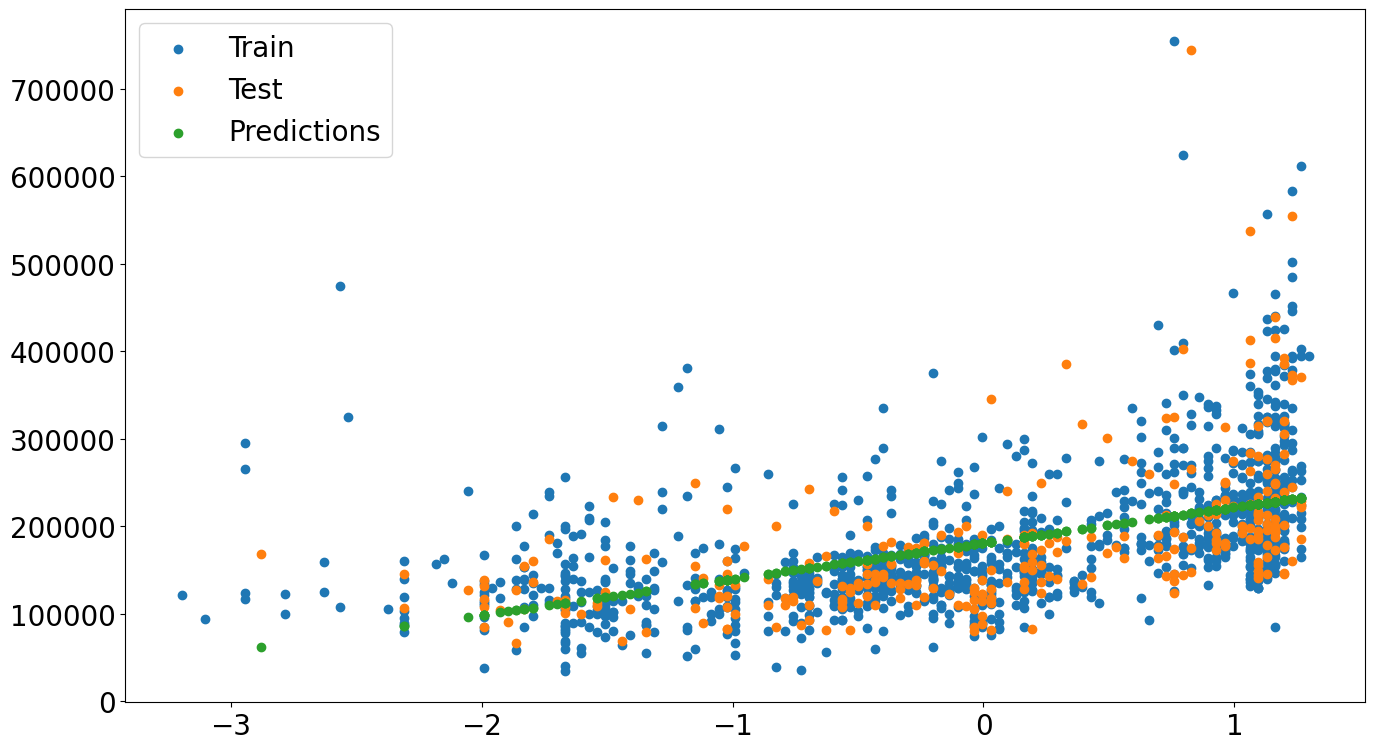

In [22]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std[:,1], y_train, label="Train")
plt.scatter(X_test_std[:,1], y_test, label="Test")
plt.scatter(X_test_std[:,1], y_pred3, label="Predictions")
plt.legend()
plt.plot()

In [23]:
# Checking our model's performance using the MSE and RMSE metrics
mse_3 = mse(y_test, y_pred3)
print(f"MSE: {mse_3}")
print(f"RMSE: {np.sqrt(mse_3):.1f}")

MSE: 4971463717.772465
RMSE: 70508.6


In [24]:
# generating a cubic feature and experimenting with it
df = pd.read_csv("train.csv")
X = df[["YearBuilt", "YearBuilt", "YearBuilt"]].values
y = df[["SalePrice"]].values.reshape(-1)

# Taking the square of X for input
X[:, 1] = X[:, 1]**2

# Taking the cube of X for input
X[:, 2] = X[:, 2]**3
print(X[0])
print(X.shape)
print(y.shape)

[      2003    4012009 8036054027]
(1460, 3)
(1460,)


In [25]:
# Splitting the X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 3)
(1168,)
(292, 3)
(292,)


In [26]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [27]:
reg4 = ScratchLinearRegression(5000, 0.01, False, True)
reg4.fit(X_train_std, y_train, X_test_std, y_test)
y_pred4 = reg4.predict(X_test_std)
y_pred4

n_iter:  0 loss:  19424268530.032784 theta:  [1808.39499196  409.70705018  411.22635838  413.59614845]
n_iter:  1 loss:  19049111689.433357 theta:  [3598.40003177  806.36177258  809.73888409  813.92657988]
n_iter:  2 loss:  18683375352.093697 theta:  [5370.50502118 1191.0622294  1196.296716   1202.30273827]
n_iter:  3 loss:  18326756521.05714 theta:  [7124.88896069 1564.1670317  1571.25847794 1579.08323474]
n_iter:  4 loss:  17978965056.44858 theta:  [8861.72906081 1926.02403272 1934.97203555 1944.61592262]
n_iter:  5 loss:  17639723016.135567 theta:  [10581.20075993  2276.97065062  2287.77481897  2299.2382201 ]
n_iter:  6 loss:  17308764033.354885 theta:  [12283.47774206  2617.33418147  2629.99413594  2643.27742333]
n_iter:  7 loss:  16985832729.16008 theta:  [13968.73195436  2947.43210291  2961.94747541  2977.05101001]
n_iter:  8 loss:  16670684157.670801 theta:  [15637.13362454  3267.57236875  3283.94280214  3300.866934  ]
n_iter:  9 loss:  16363083282.22402 theta:  [17288.85127802 

array([161542.52012693, 140118.35631096, 152138.2243745 , 188680.83678565,
       180497.39805684,  99327.36471212, 230140.82149164, 134801.8972991 ,
       214833.44691511, 225953.93972276, 228744.18099634, 187314.42749723,
       218996.04999801, 175061.77147643, 149460.21209804, 161542.52012693,
       209297.44014708, 212063.42616479, 173705.36115658, 105842.82005002,
       154820.20265521, 225953.93972276, 169642.11512958, 212063.42616479,
       184584.61349224,  63290.28867599, 220385.60510963, 179136.99283558,
       230140.82149164, 148122.69223516, 162889.964763  , 210679.92900961,
       190048.24811868, 220385.60510963, 231538.47574662, 214833.44691511,
       227348.55387021, 181858.8029797 , 224560.33816347, 212063.42616479,
       152138.2243745 , 158850.61316803, 227348.55387021, 225953.93972276,
       213447.93200313, 170995.53337365, 158850.61316803, 187314.42749723,
       190048.24811868, 146786.16270183, 224560.33816347, 172349.94858582,
       188680.83678565, 1

[]

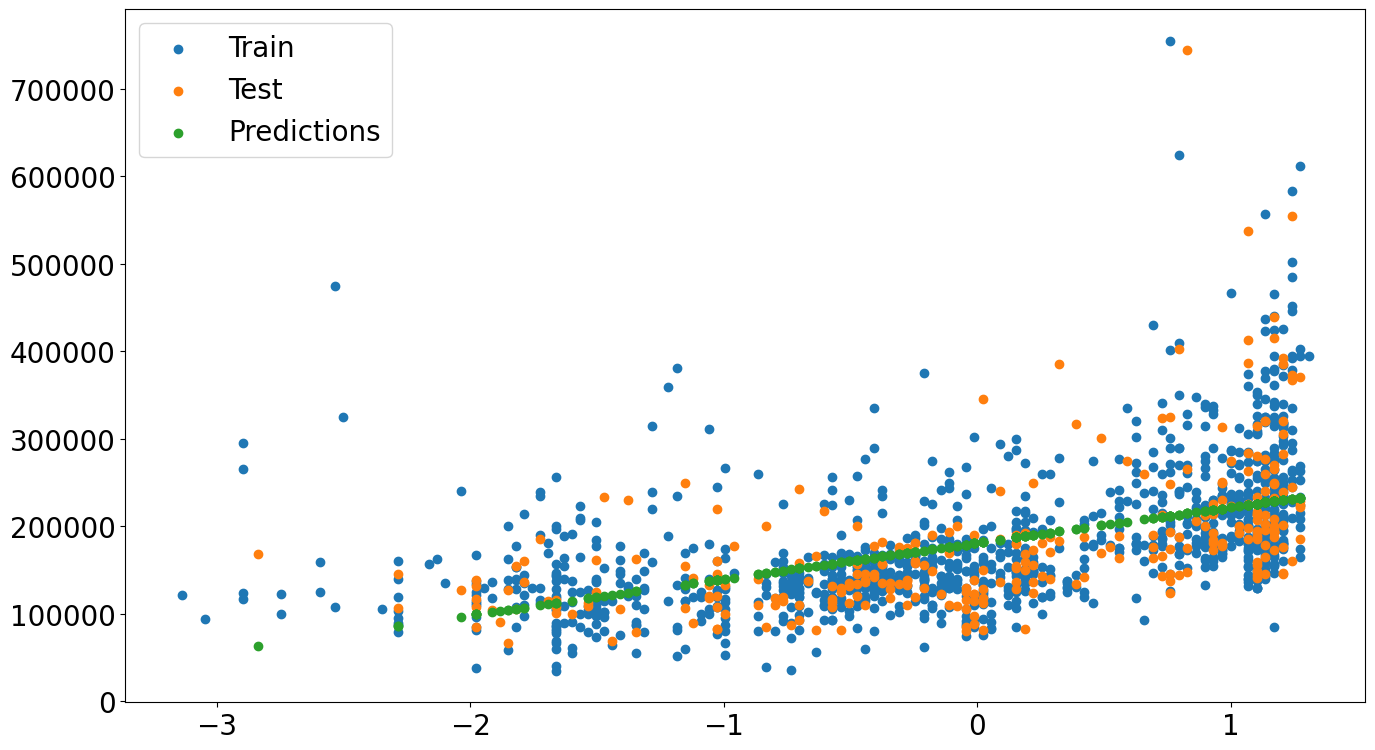

In [28]:
fig = plt.subplots(figsize=(16, 9))
plt.rcParams["font.size"] = 20

plt.scatter(X_train_std[:,2], y_train, label="Train")
plt.scatter(X_test_std[:,2], y_test, label="Test")
plt.scatter(X_test_std[:,2], y_pred4, label="Predictions")
plt.legend()
plt.plot()

In [29]:
# Checking our model's performance using the MSE and RMSE metrics
mse4 = mse(y_test, y_pred4)
print(f"MSE: {mse4}")
print(f"RMSE: {np.sqrt(mse4):.1f}")

MSE: 4960227137.245357
RMSE: 70428.9


The number of theta values in the model increases with respect to an increament in the number of features.

## Problem Ten: (Advance task) Derivation of update formula

Proving the formula: $ 

To derive the following $⍬j =  ⍬_{j} - ⍺ \frac{1}{m} \sum_{i=1}^m h⍬((x) - y_{i}) x_{j}$(gradient descent formula), we start by taking the derivative of the loss function, $ J(⍬) = \frac{1}{2m}\sum_{i=1}^m [h_{⍬}(x^{(i)}) - y^{(i)}]^2 $,  with respect to the weights($⍬_{j}$). The resulting values represent the new weights and are then multiplied by the learning rate, this product serves as the step size of the  descent to the loss function's minima. Finally, in order to ensure that we're descending the slope rather than ascending, we update the ⍬ values by subtracting the step size from the old ⍬ values. Capturing the above steps in an equation, we get; $ \theta_{j} - ⍺\frac{𝚫J(⍬)}{𝚫⍬_{j}} $, let's call this equation 1.

Following these steps:
First, let's simplify J(⍬):
$J(⍬) = \frac{1}{2m}\sum_{i=1}^m (h_{⍬}x^{(i)})^2 - 2y^{(i)}h_{⍬}x^{(i)} + (y^{(i)})^2 $

Next, we differentiate J(⍬) with respect to ⍬, this yields:
$ \frac{𝚫J(⍬)}{𝚫⍬_{j}} = \frac{1}{2m}\sum_{i=1}^m 2h_{⍬}(x^{(i)})^2 - 2y^{(i)}x^{(i)} $

Simplifying, we get: $ \frac{𝚫J(⍬)}{𝚫⍬_{j}} = \frac{1}{m}\sum_{i=1}^m h_{⍬}(x^{(i)})^2 - y^{(i)}x^{(i)} $

Factorizing, we get: $ \frac{𝚫J(⍬)}{𝚫⍬_{j}} = \frac{1}{m}\sum_{i=1}^m x_{j}^{(i)}(h_{⍬}x^{(i)} - y^{(i)}) $. We shall refer to this as equation 2.

Now plugging $ \frac{𝚫J(⍬)}{𝚫⍬_{j}} $ into our equation 1, we get:
$ \theta_{j} - ⍺\frac{1}{m}\sum_{i=1}^m x_{j}^{(i)}(h_{⍬}x^{(i)} - y^{(i)}) $

## Problem Eleven: (Advance task) Problem of local optimum solution

With linear regression, you can always find the optimal solution when optimizing the objective function if you continue learning. To understand this, let's break down some concepts:

**Convex Nature of Linear Regression**:
   In linear regression, the objective function (such as the sum of squared errors) is convex. This means that its graph forms a "bowl" shape with a single global minimum and no local minima.

**Mathematical Formulation**:
   The objective function in linear regression, typically the sum of squared errors (SSE), can be represented mathematically as:

   $ SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

   Where $y_{i}$ is the actual value and $\hat{y}_i$ is the predicted value. This objective function is usually convex.

**Optimization with Gradient Descent**:
   Gradient descent, when applied to linear regression, aims to minimize the SSE by iteratively updating the parameters (coefficients of the linear model) until convergence.

**Convex Graph**:
   The convex nature of the SSE graph ensures that there is only one global minimum, making it straightforward for gradient descent to find the optimal solution. Here's a conceptual representation of a convex graph:

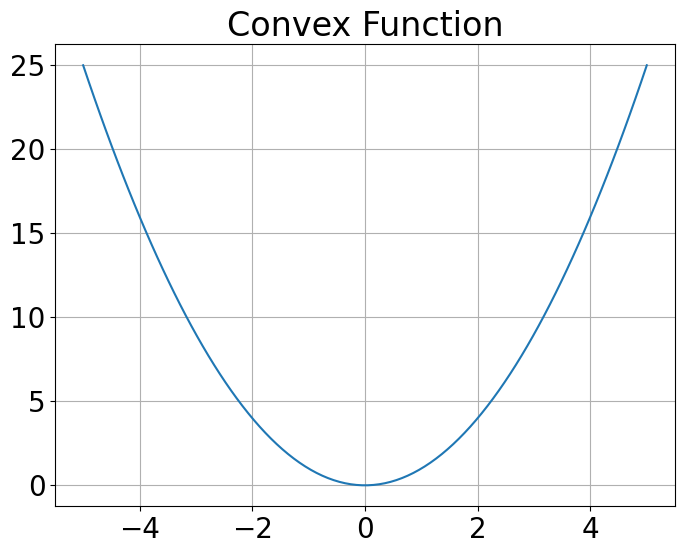

In [30]:
# Define a convex function
def convex_function(x):
    return x**2

# Generate data points for plotting
x_values = np.linspace(-5, 5, 100)
y_values = convex_function(x_values)

# Plot the convex function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Convex Function')
plt.title('Convex Function')
plt.grid(True)
plt.show()

As you can see, there's only one minimum point, making it easy for gradient descent to converge to the optimal solution regardless of the starting point.

In summary, the convex nature of the objective function in linear regression guarantees that there's only one global minimum, eliminating the problem of locally optimal solutions. This makes it possible for gradient descent to always find the optimal solution with continued learning.